<h1 style = 'color:purple'> Classification  </h1>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc,confusion_matrix

%matplotlib inline

In [2]:
#reading dataset : for understanding variables refer to mushrooms_readmefile
dataset = pd.read_csv('data\mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Classification** is a fundamental task in machine learning that involves categorizing or assigning data instances into predefined classes or categories based on their features or attributes. It is a supervised learning problem where the algorithm learns from labeled examples to make predictions on new, unseen data.
   

  - In classification, the goal is to build a model that can accurately assign the correct class label to new, unlabeled data instances. The model is trained on a labeled dataset, which consists of input features and their corresponding class labels. The input features represent the characteristics or measurements of the data instances, while the class labels represent the predefined categories or classes.

The process of classification involves several steps:

1. Data Preparation: The dataset is divided into a training set and a test set. The training set is used to train the classification model, while the test set is used to evaluate its performance on unseen data.

2. Feature Extraction/Selection: Relevant features are extracted or selected from the data to represent the characteristics that are most informative for classification.

3. Model Training: The classification model is trained using the labeled training data. Various algorithms can be used for training, such as logistic regression, decision trees, support vector machines (SVM), random forests, or neural networks.

4. Model Evaluation: The trained model is evaluated using the test set to assess its accuracy and performance in predicting the correct class labels for unseen data. Common evaluation metrics for classification include accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC).

5. Prediction: Once the model is trained and evaluated, it can be used to predict the class labels of new, unlabeled data instances based on their features. The model applies the learned patterns and decision boundaries to assign the most appropriate class label to each instance.

Classification has numerous real-world applications, such as email spam filtering, sentiment analysis, image recognition, fraud detection, disease diagnosis, customer segmentation, and many more. It is a valuable tool for automating decision-making processes and organizing data into meaningful categories.






                            Choosing Model Between Regression and Classification 

**Regression:**

- Predicts a continuous numerical value.
- Focuses on estimating or approximating quantities.
- Uses evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or R-squared.
- Models the relationship between input features and the continuous output variable.
- Provides insights into the relationship between input variables and the predicted outcome.
- Can be sensitive to outliers.

**Classification:**

- Predicts categorical class labels.
- Assigns inputs to specific categories or classes.
- Uses evaluation metrics such as accuracy, precision, recall, or area under the ROC curve (AUC).
- Determines decision boundaries or rules to separate feature space into different classes.
- Focuses on prediction and assigning classes rather than interpreting model parameters.
- Less sensitive to outliers compared to regression.

These distinctions highlight the nature of the *output variable, evaluation metrics, decision boundaries, interpretability, and handling of outliers*. Choosing between regression and classification depends on the *specific problem, desired prediction outcome, and characteristics of the data*.

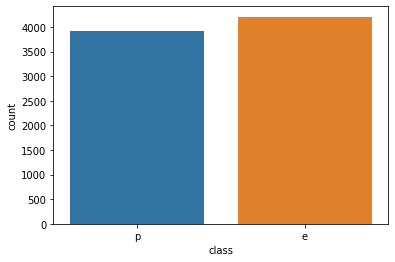

In [3]:
X = dataset['class']
cat = sns.countplot(x = X , data = dataset['class'])

In [4]:
def plot_data(hue,data):
    for i,col in enumerate(data.columns):
        plt.figure(i)
        ax = sns.countplot(x = data[col], data = data)   

In [5]:
##run this function if you want to see all data distribution

# hue = dataset['class']
# data_to_plot = dataset.drop('class', axis =1)
# plot_data(hue,data_to_plot)

### Pre-processing

In [7]:
# checking for null
for col in dataset.columns:
    count_blank = dataset[col].isnull().sum()
    print(f"{col} : {count_blank}" )

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


**Why it is important to perform Encoding or LabelEncoding while working with Machine Learning Model ?**

Encoding or label encoding is performed in machine learning to transform categorical variables into numerical representations that can be effectively used by machine learning algorithms. Categorical variables are variables that take on a limited number of distinct values or categories.

Here are a few reasons why encoding or label encoding is necessary:

1. Numerical Representation: Machine learning algorithms generally operate on numerical data. By encoding categorical variables into numerical representations, we enable the algorithms to process and analyze the data more effectively.


2. Algorithm Compatibility: Many machine learning algorithms, such as linear regression, decision trees, and neural networks, are designed to work with numerical input variables. Encoding categorical variables allows us to use a wider range of algorithms that may not directly support categorical data.


3. Feature Representation: Encoding categorical variables properly ensures that the encoded values preserve the inherent relationships and characteristics of the original categorical values. For example, if we have a categorical variable representing different sizes (small, medium, large), encoding it into numerical values (0, 1, 2) maintains the order and relative differences between the sizes.


4. One-Hot Encoding: In some cases, label encoding may not be sufficient or appropriate, especially when dealing with nominal categorical variables (where the categories have no inherent order). One-hot encoding is another technique used to represent categorical variables, where each category is converted into a binary vector, and only one element in the vector is 1, indicating the presence of that category. This ensures that no ordinal relationship is assumed between categories.


5. Improved Model Performance: Proper encoding of categorical variables can contribute to better model performance. Machine learning algorithms can leverage the encoded information to identify patterns, correlations, and dependencies between categorical features and the target variable.

It is important to note that the choice between label encoding, one-hot encoding, or other encoding techniques depends on the specific characteristics of the data, the nature of the categorical variable, and the requirements of the machine learning task. Care should be taken to apply appropriate encoding methods to ensure meaningful representation of the categorical data in the context of the problem at hand.

In [8]:
# LabelEncoding for 'class' i.e. Transforming dataset['class'] into 1 & 0 form

le = LabelEncoder()
dataset['class'] = le.fit_transform(dataset['class'])

dataset['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

In [9]:
# encoding for all features
encoded_data = pd.get_dummies(dataset , dtype=int)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### Train-Test Model

In [10]:
y = dataset['class'].values.reshape(-1,1)
X = encoded_data.drop(['class'], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

<h2 style = 'color: #FF0070'> Logistic Regression  </h2>

In [11]:
from sklearn.linear_model import LogisticRegression

- Logistic regression is a statistical and machine learning algorithm used for *binary classification tasks*, where the goal is to **predict the probability of an instance belonging to a particular class**. It is widely used when the dependent variable (the target variable) is categorical and has two possible outcomes, typically represented as 0 and 1.


- Despite its name, logistic regression is a classification algorithm rather than a regression algorithm because it predicts the probability of belonging to a certain class rather than a numerical value.


- The logistic regression model applies the **logistic function (also called the sigmoid function)** to the linear combination of the input features. The logistic function maps the linear combination to a value between 0 and 1, representing the predicted probability of the positive class.

- The formula for logistic regression can be expressed as:

                P(Y=1|X) = 1 / (1 + e^(-z))
        Where:
             P(Y=1|X) represents the probability of the positive class given the input features X.
             e is the base of the natural logarithm (approximately 2.71828).
             z is the linear combination of the input features and their respective coefficients.
     
- The logistic regression model is trained using a method called **maximum likelihood estimation**, which adjusts the coefficients of the input features to maximize the likelihood of the observed data. The optimization process aims to **find the best set of coefficients that minimize the difference between the predicted probabilities and the true class labels in the training data.**


- To make predictions using logistic regression, a decision threshold is applied to the predicted probabilities. For example, if the threshold is set at 0.5, instances with predicted probabilities above 0.5 are classified as the positive class (1), while instances below 0.5 are classified as the negative class (0).


- Logistic regression has numerous applications, including spam detection, disease diagnosis, credit scoring, sentiment analysis, and many other binary classification tasks. It is a widely used and interpretable algorithm for understanding the relationship between input features and the probability of a particular class.

In [12]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train.ravel())

y_prob = logistic_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5,1,0)

In [13]:
log_confusion_matrix = confusion_matrix(y_test,y_pred)
log_confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [14]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

1.0

In [15]:
def plot_roc(roc_auc):
    plt.figure(figsize=(6,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate,color = 'red',label = 'AUC = %0.2f' % roc_auc )
    plt.legend()
    plt.plot([0,1],[0,1],linestyle ='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    

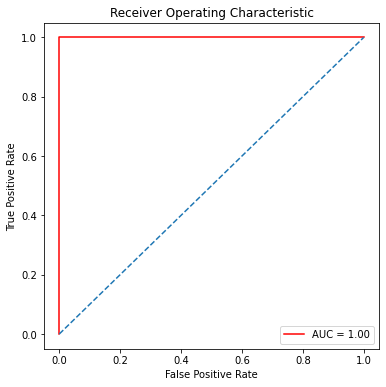

In [16]:
plot_roc(roc_auc)

<h2 style = 'color:darkviolet'> Linear Discriminant Analysis (LDA)  </h2>

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [18]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train.ravel())

y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda > 0.5,1,0)

In [19]:
lda_confusion_matrix = confusion_matrix(y_test,y_pred_lda)
lda_confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [20]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_prob_lda)
roc_auc_lda = auc(false_positive_rate,true_positive_rate)
roc_auc_lda

1.0

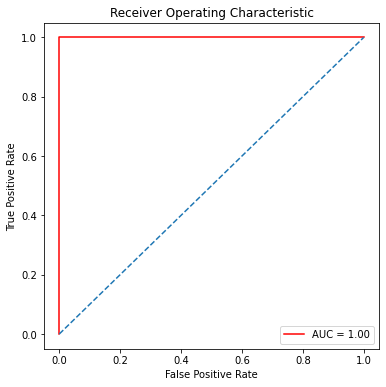

In [21]:
plot_roc(roc_auc_lda)

<h2 style = 'color:#0081FF'> Quadratic Discriminant Analysis (LDA)  </h2>

In [22]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [23]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train.ravel())

y_prob_qda = lda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5,1,0)

C:\Users\deeks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [24]:
qda_confusion_matrix = confusion_matrix(y_test,y_pred_qda)
qda_confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [25]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_prob_qda)
roc_auc_qda = auc(false_positive_rate,true_positive_rate)
roc_auc_qda

1.0

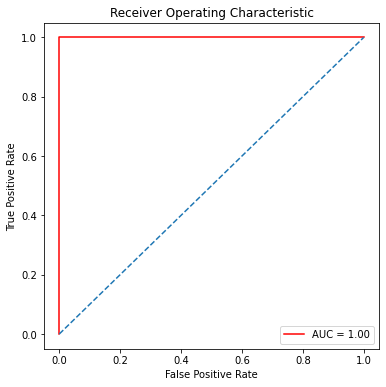

In [26]:
plot_roc(roc_auc_qda)